# <font color="purple">**Licenciatura en Tecnologías para la Información en Ciencias**</font>

## <font color="blue">**Procesamiento Digital de Imágenes**</font>

### <font color="blue">**Proyecto: Segmentación**</font>

### Angélica Nayeli Rivas Bedolla:    418128734
### Pablo Clemente Moreno:   418125805

### Semestre 2021-1

### Viernes 05 de febrero de 2021

# Introducción

La visión por computadora (en inglés Computer Vision) es un campo científico interdisciplinario que se ocupa de cómo pueden hacer las computadoras para obtener una comprensión de alto nivel a partir de imágenes o videos digitales. Desde la perspectiva de la ingeniería, busca automatizar las tareas que puede realizar el sistema visual humano.<br>

$\hspace{11cm}$ <img src="./sources/images/intro/computer_vision.jpeg"/><br>

Para entender qué es la __segmentación__ semántica existen varios niveles de granularidad en los que las computadoras pueden comprender las imágenes. Para cada uno de estos niveles hay un problema definido en el dominio de Computer Vision:<br>

$\hspace{7cm}$<img src="./sources/images/intro/intro_img.png" width="512"/>

Una implementación a la segmentación semnántica es para la detección de enfermedades o estructuras en imágenes médicas.

Una buena base de datos para el análisis de imágenes médicas es _DIARETDB1 diabetic retinopathy database and
evaluation protocol_, que brinda imágenes de fondo de ojo de personas diabéticas.

Entre las estructuras que se observan en estas imágenes están los vasos sanguíneos oculares. La sangre que circula por el cuerpo es transportada por el sistema circulatorio para trasladar nutrientes, oxígeno, desechos del cuerpo y agua a las células de todas las partes vitales del cuerpo.
En el ojo, las arterias suministran de sangre y las arterias drenan la sangre. Estos conductos tienen forma de estructuras huecas y tubulares, como se muestra en la imagen a continuación.


$\hspace{11cm}$ <img src="./sources/images/intro/bloodvessels.jpg" width="412"/><br>


En este proyecto se busca diseñar e implementar un algoritmo de segmentación de vasos sanguíneos sobre la base de datos de imágenes DIARETDB1 que contiene 89 imágenes de fondo de ojo. Haciendo uso de herramientas de Computer Vision como lo son el preprocesamiento y la segmentación.

Para esto es necesario tomar en cuenta la necesidad de aplicar previamente __operaciones puntuales__, __suavizado__, __operaciones morfologicas__, entre otras. Lo anterior, con la finalidad de que la entrada de nuestro algortimo de segmentación se optima y obtener como resultado segmentaciones más precisas.

# Algoritmo

El algoritmo completo está en el archivo $main.py$ en la carpeta $sources$.

## Librerías usadas

In [1]:
#manejar carpetas
import os

#cargar bibliotecas necesarias
import numpy as np
import cv2

#graficar
import matplotlib.pyplot as plt
from matplotlib.pyplot import figure

#leer imagenes
from PIL import Image

#barra de progreso
from tqdm import tqdm

from procesamiento import *
from segmentacion import * 

Nota: tomar en cuenta la versión para ejecutar el notebook/código

In [2]:
cv2.__version__

'3.4.2'

## Algoritmo de Segmentación Watershed

Procedimientos:
1. Binarización
2. Es conveniente eliminar cualquier pequeño ruido blanco en la imagen. Para esto utilizamos la operación morfológica _apertura_
3. Detectar el fondo y primer plano. Para esto usamos dilatación y transformación de distancia (respectivamnte)
4. Identificar areas desconocidas. Para esto usamos el método _sustract_ con resultado del paso 3
5. Etiquetar areas conocidas como indicadores
6. Marcar como 1 todos los indicadores, así el fondo no es 0, sino 1
7. Etiquetar areas desconocidas como 0
8. Aplicar Segementación Watershed sobre la imagen original y resultado de los pasos (5 al 7) 

### Filtros

El objetivo de usar filtros de suavizado es conseguir que las intensidades de los objetos pequeños se mezclen con el fondo con el fin de detectar los objetos de mayor tamaño, esto reduciendo la variación de intensidad entre pixeles vecinos. Para este problema se propusieron dos filtros: filtro de suavizado de media y filtro de suavizado Gaussiano. La forma en la que funcionan es:

 - El filtro de suavizado de media asigna al valor actual la media de la vecindad en la que se ubica. 
 - El filtro de suavizado Gaussiano modela una distribución normal en la vecindad y con eso pondera los valores, reduciendo el peso conforme se aleja del pixel actual.

Gracias a esto, el filtro de suavizado Gaussiano produce un suavizado más uniforme que el de media. Pero para la aplicación actual, necesitamos un contraste entre los objetos grandes y pequeños.

### Parámetros

Los siguientes parámetros fueron definidos a base de prueba y error:
- Para Media y Gaussiano con iteraciones > 1 se perdía calidad.
- Para Dilatación y Apertura se probó con hasta 25 iteraciones sin ver reflajado mucha diferencia a 1-2 iteraciones.

Método | iteraciones | kernel
-- | -- | -- | 
Media | 1 | (3x3)÷13 |
Gaussiano | 1 | k=3|
Clahe | 1 | grid=3x3| 
Dilatación| 2 | 3x3| 
Apertura | 1 | 3x3|

# Anáslis de Resultados

Se realizaron 3 pruebas del código antes de aplicar CLAHE, la primera usando solo el filtrado Gaussiano, la segunda solo filtro de Media y la tercera ambos. Variando parámetros para cada caso, se llegaron a las siguientes conclusiones:

- Usando solo filtrado Gaussioano dio como resultado segementaciones demasiado granuladas.
- Usando solo filtrado Media dio como resultado segmentaciones poco granuladas pero con inconcistencias.
- Usando ambos filtros dio como resultado un punto medio entre los dos eventos anteriores, por lo que con las imágenes en resolución original fue el método selecionado como más conveniente. Según Quintana Vivanco, Leaned & Hubert, Fredes & Marañón, Enrique (2013) "Realizar una combinación del filtro mediana + el filtro gaussiano ayuda a simplificar  y/o  cambiar  la  representación  de  una  imagen, convirtiéndola en  otra más significativa y más  fácil de analizar", solo que a diferencia de esta referencia nosostros experimentamos con la combinación filtro media + filtro gaussiano.

Siguiendo con lo anterior comparamos cada caso, por ejemplo:

In [3]:
image001 = Image.open('./sources/images/image001.png')
image001gauss = Image.open('./output/output_gauss/image001.png')
image001gm = Image.open('./output/media-gauss/image001.png')
image001media = Image.open('./output/output_media/image001.png')

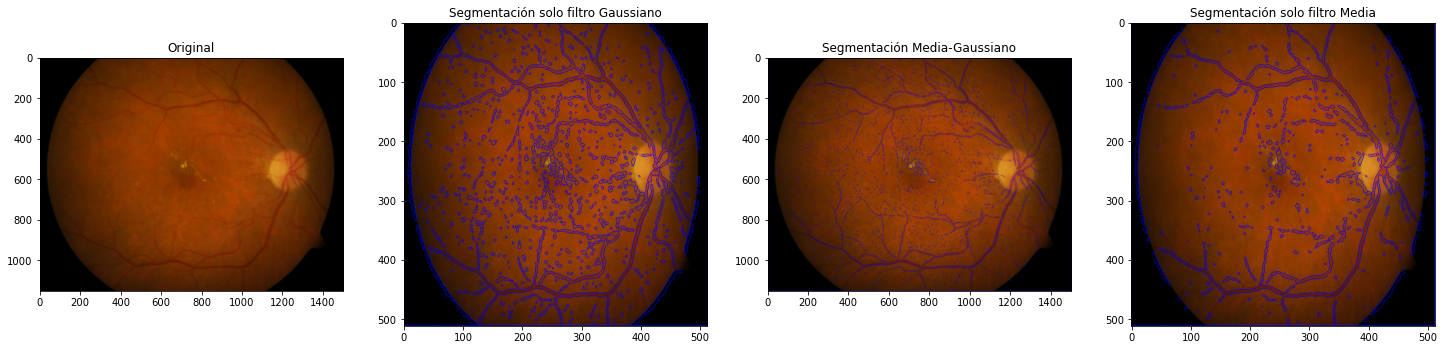

In [10]:
fig = plt.gcf()
ax = fig.add_subplot()
fig.set_size_inches(25, 10)

plt.subplot(141),plt.imshow(image001),plt.title('Original');
plt.subplot(142),plt.imshow(image001gauss),plt.title('Segmentación solo filtro Gaussiano');
plt.subplot(143),plt.imshow(image001gm),plt.title('Segmentación Media-Gaussiano');
plt.subplot(144),plt.imshow(image001media),plt.title('Segmentación solo filtro Media');

## Conclusiones

En terminos generales y a modo de conclusión, usando los métodos de filtrado Gaussiano y Media, trabajados conjuntamente con ajuste CLAHE (contraste) y la operación morfológica de apertura (eliminación de ruido blanco) se pueden realizar distintas combinaciones, lo que da como resultado distintos escenarios. Con solo suavizado gaussiano se obtenía demasiado ruido y con solo el suavizado de media se disminuyó el ruido pero también se perdieron vasos sanguíneos. La combinación de suavisado gaussiano y suavisado de media ayudó a obtener el punto intermedio esperado.

Como equipo, aprendimos lo importante que es la comunicación al momento de hacer un proyecto. Por falta de comunicación hubo problemas en las implementaciones (como dobles funciones que hacian que el algoritmo no funcionara como debería) y diferencias en versiones de OpenCV. Por ello, queremos hacer notar este aprendizaje valioso que nos quedó de este proyecto.

## Referencias

- Circulatorio, vasos sanguíneos. Visiblebody.com. Retrieved 4 February 2021, from https://www.visiblebody.com/es/learn/circulatory/circulatory-blood-vessels.
- Músculos, nervios y vasos sanguíneos de los ojos - Trastornos oftálmicos - Manual MSD versión para público general. Manual MSD versión para público general. (2019). Retrieved 3 February 2021, from https://www.msdmanuals.com/es/hogar/trastornos-oft%C3%A1lmicos/biolog%C3%ADa-de-los-ojos/m%C3%BAsculos-nervios-y-vasos-sangu%C3%ADneos-de-los-ojos.
- OpenCV: Image Segmentation with Watershed Algorithm. (2021). Retrieved 5 February 2021, from https://docs.opencv.org/master/d3/db4/tutorial_py_watershed.html
- Quintana Vivanco, Leaned & Hubert, Fredes & Marañón, Enrique. (2013). OPTIMIZACIÓN DE LOS FILTROS MEDIANA-GAUSSIANO PARA UNA MEJOR CONVERGENCIA DEL SNAKE EN LA SEGMENTACIÓN DE IMÁGENES MÉDICAS. 
- Understanding Semantic Segmentation with UNET. (2019). Retrieved 5 February 2021, from https://towardsdatascience.com/understanding-semantic-segmentation-with-unet-6be4f42d4b47